# Problem 1: Multi-dimensional coat

# Part 1: Dataset

In [1]:
import sklearn
import pandas as pd

from keras.datasets import fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
train_x.shape

(60000, 28, 28)

In [9]:
fashion_dict = {0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress",
                4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 
                8: "Bag", 9: "Ankle boot"}

In [12]:
tshirt = train_x[train_y == 0][:500]
trouser = train_x[train_y == 1][:500]
pullover = train_x[train_y == 2][:500]
dress = train_x[train_y == 3][:500]
coat = train_x[train_y == 4][:500]
sandal = train_x[train_y == 5][:500]
shirt = train_x[train_y == 6][:500]
sneaker = train_x[train_y == 7][:500]
bag = train_x[train_y == 8][:500]
boot = train_x[train_y == 9][:500]

In [34]:
import numpy as np
test = np.concatenate((tshirt, trouser, pullover, dress, coat, sandal,
                       shirt, sneaker, bag, boot))
label = np.concatenate((np.zeros(500), np.repeat(1, 500), np.repeat(2, 500), 
                        np.repeat(3, 500), np.repeat(4, 500), np.repeat(5, 500),
                        np.repeat(6, 500), np.repeat(7, 500), np.repeat(8, 500),
                        np.repeat(9, 500)))
train_X, train_Y = sklearn.utils.shuffle(test, label, random_state=0)

# now we have 500 of each class, for 5000 elements total
train_X.shape

(5000, 28, 28)

# Part 2: Dimensionality

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# help from lab-11
X = train_X.reshape(train_X.shape[0], -1)
pca = PCA(n_components=4)
X_transformed = pca.fit(X).transform(X)

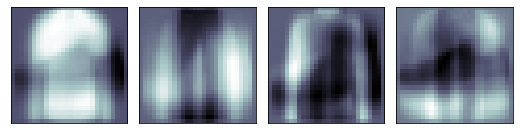

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='bone')

It looks like each of the top 4 componenets is trying mostly to compare against a shirt, pants, and sneaker. But at this level it is hard to tell.

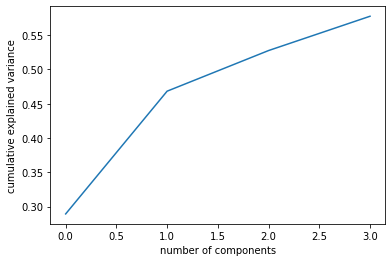

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

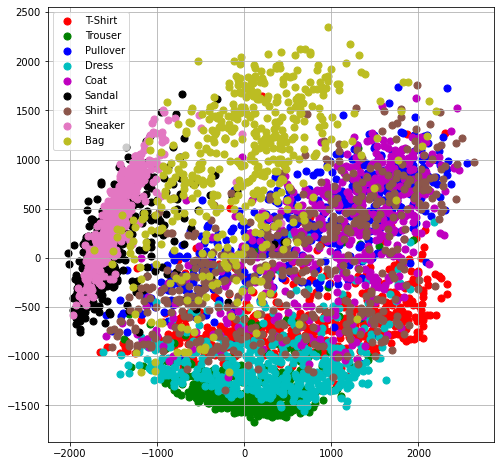

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
colors = ['r','g','b','c','m','k','tab:brown','tab:pink','tab:olive']
targets = fashion_dict.values()
labels = fashion_dict.keys()
for target, color, lab in zip(targets, colors, labels):
  ax.scatter(X_transformed[train_Y == lab][:,0],
             X_transformed[train_Y == lab][:,1],
             c=color,
             s=50)
ax.legend(targets)
ax.grid()

In [45]:
np.random.seed(42)
noisy = np.random.normal(X, 4)
pca2 = PCA(0.75).fit(noisy)
d = pca2.n_components_
print("# of components needed for 75% variance explanation:", d)

# of components needed for 75% variance explanation: 14


In [54]:
pca3 = PCA(n_components = d)
components = pca.transform(X)
X_projected = pca.inverse_transform(components)

In [55]:
from random import *
indices = [randint(0,4999),randint(0,4999),randint(0,4999)]

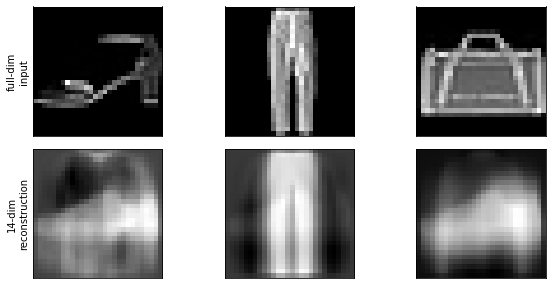

In [59]:
fig, ax = plt.subplots(2, 3, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(3):
    index = indices[i]
    ax[0, i].imshow(X[index].reshape(28, 28), cmap='binary_r')
    ax[1, i].imshow(X_projected[index].reshape(28, 28), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('{}-dim\nreconstruction'.format(d));

# Part 3: Plot

In [63]:
pca4 = PCA(n_components=2)
X_transformed = pca.fit(X).transform(X)

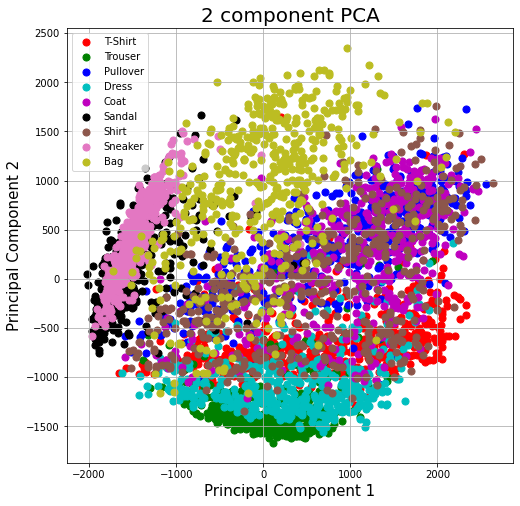

In [64]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
for target, color, lab in zip(targets, colors, labels):
    ax.scatter(X_transformed[train_Y == lab][:, 0]
               , X_transformed[train_Y == lab][:, 1]
               , c=color
               , s=50)
ax.legend(targets)
ax.grid()

I would not be able to distinguish classes without knowing the colours in advance for the above scatterplot. They are too close together generally for me to make any judgements.

# Part 4: SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


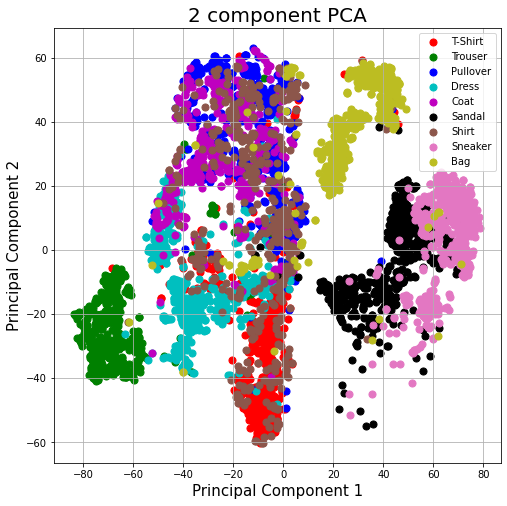

In [65]:
# help from https://ranasinghiitkgp.medium.com/t-sne-visualization-of-high-dimension-mnist-dataset-48fb23d1bafd
from sklearn.manifold import TSNE

# going with n_components = 2 to directly compare to 1.3's plot
model = TSNE(n_components=2)
tsne_data = model.fit_transform(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
for target, color, lab in zip(targets, colors, labels):
    ax.scatter(tsne_data[train_Y == lab][:, 0]
               , tsne_data[train_Y == lab][:, 1]
               , c=color
               , s=50)
ax.legend(targets)
ax.grid()

This scatterplot is quite a bit more distinguishable than 1.3's. I could start to make some judgement calls now, without knowing the label/colour matching. For example, it makes sense that there is so much overlap with t-shirt, shirt, dress, and pullover, given what the garments look like.